In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape

(2111, 17)

## Data exploration and Visualization

Read the article (https://doi.org/10.1016/j.dib.2019.104344) to see the description of the attributes.

In [6]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.shape)

24
(2087, 17)


In [7]:
unique_counts = df.nunique()
unique_counts

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [9]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df['BMI'] = round(df['Weight'] / (df['Height'] ** 2),2)

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035,29.765750
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153,8.024953
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000,24.370000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866,28.900000
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000,36.095000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.810000


In [12]:
df['Gender'].value_counts()

Gender
Male      1052
Female    1035
Name: count, dtype: int64

In [13]:
df.groupby('NObeyesdad')['BMI'].agg(['min','max']).sort_values(by='min', ascending=True)

,min,max
NObeyesdad,,
Insufficient_Weight,13.00,19.08
Normal_Weight,18.49,24.91
Overweight_Level_I,22.83,28.77
Overweight_Level_II,25.71,30.36
Obesity_Type_I,29.91,35.17
Obesity_Type_II,34.05,39.79
Obesity_Type_III,36.77,50.81


In [14]:
counts_ = df.value_counts('NObeyesdad')
counts_

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

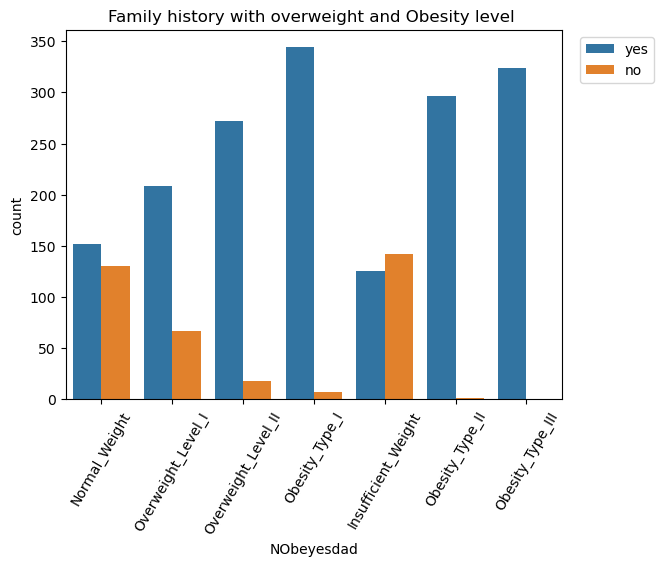

In [15]:
sns.countplot(data=df, x='NObeyesdad', hue='family_history_with_overweight')
plt.xticks(rotation = 60)
plt.title('Family history with overweight and Obesity level ');
plt.legend(bbox_to_anchor=(1.2, 1.), loc='upper right')

<Axes: xlabel='BMI', ylabel='Count'>

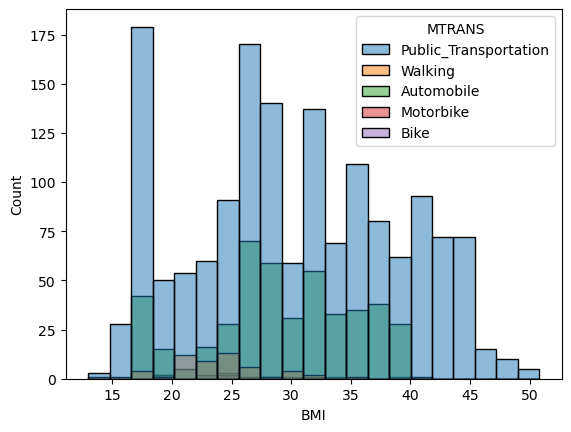

In [16]:
sns.histplot(data=df, x='BMI', hue='MTRANS', alpha=0.5, palette='tab10')

In [17]:
bmi_min = df.groupby('NObeyesdad')['BMI'].min().reset_index()
bmi_min

,NObeyesdad,BMI
0,Insufficient_Weight,13.00
1,Normal_Weight,18.49
2,Obesity_Type_I,29.91
3,Obesity_Type_II,34.05
4,Obesity_Type_III,36.77
5,Overweight_Level_I,22.83
6,Overweight_Level_II,25.71


In [18]:
sorted_categories = bmi_min.sort_values(by='BMI')['NObeyesdad'].tolist()
sorted_categories

['Insufficient_Weight',
 'Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III']

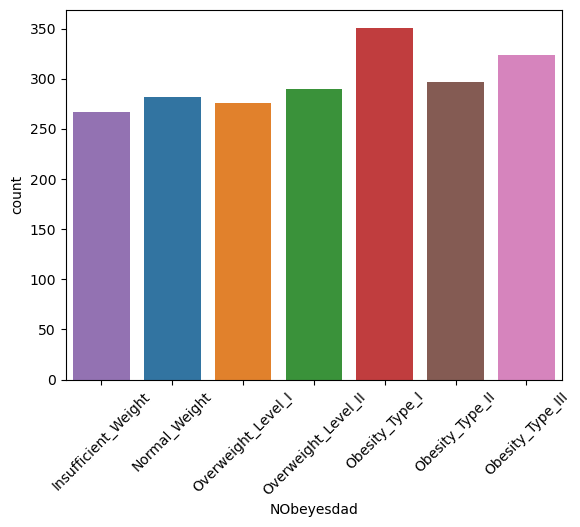

In [19]:
sns.countplot(data =df, x='NObeyesdad', hue='NObeyesdad',order=sorted_categories)
plt.xticks(rotation=45);

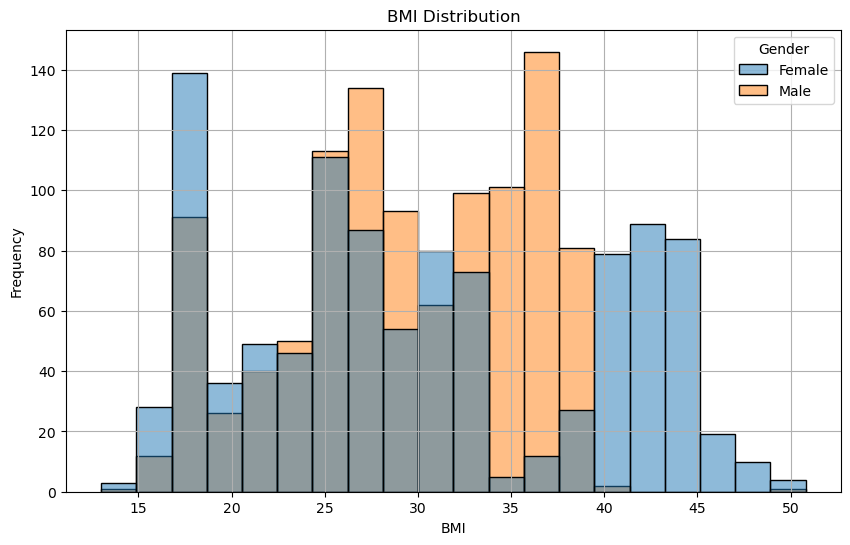

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='Gender', bins=20, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Age-BMI contrast')

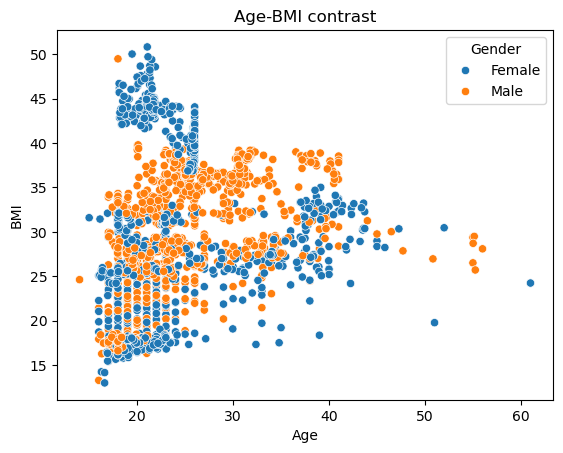

In [21]:
sns.scatterplot(data = df, x= 'Age', y = 'BMI', hue='Gender')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age-BMI contrast')

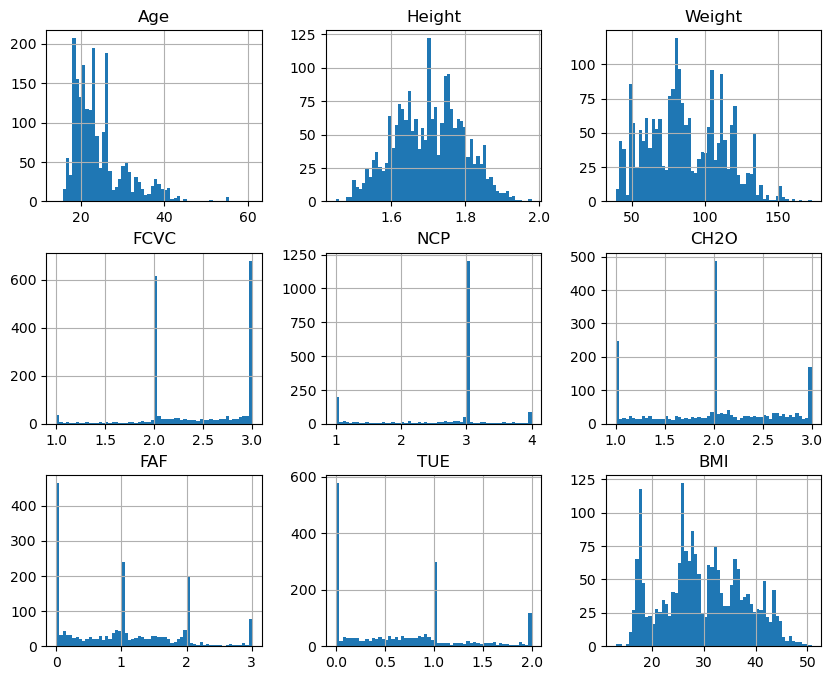

In [22]:
df.hist(figsize=(10,8), bins=60);

## Data Preparation

In [47]:
df_copy = df.copy()

In [48]:
df_copy = df_copy.drop(['Height', 'Weight','BMI'], axis =1)

In [49]:
cols_int = ['Age','FCVC','NCP','CH2O','FAF','TUE']

for col in cols_int:
    #round to nearest whole number
    df_copy[col] = df_copy[col].round().astype('int') 

In [50]:
df_copy.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [51]:
cols_cat = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in cols_cat:
    
    df_copy[col] = df_copy[col].astype('str')

In [52]:
df_copy.dtypes

Gender                            object
Age                                int32
family_history_with_overweight    object
FAVC                              object
FCVC                               int32
NCP                                int32
CAEC                              object
SMOKE                             object
CH2O                               int32
SCC                               object
FAF                                int32
TUE                                int32
CALC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object

In [53]:
df_copy.nunique()

Gender                             2
Age                               40
family_history_with_overweight     2
FAVC                               2
FCVC                               3
NCP                                4
CAEC                               4
SMOKE                              2
CH2O                               3
SCC                                2
FAF                                4
TUE                                3
CALC                               4
MTRANS                             5
NObeyesdad                         7
dtype: int64

In [54]:
df_copy = pd.get_dummies(df_copy,columns=["Gender","family_history_with_overweight","FAVC",
                                          "CAEC","SMOKE","SCC","CALC","MTRANS"],drop_first =True, dtype=int)

In [55]:
df_copy.head()

,Age,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,2,3,2,0,1,Normal_Weight,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,21,3,3,3,3,0,Normal_Weight,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,23,2,3,2,2,1,Normal_Weight,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,27,3,3,2,2,0,Overweight_Level_I,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22,2,1,2,0,0,Overweight_Level_II,1,0,0,...,0,0,0,0,1,0,0,0,1,0


<Axes: xlabel='Age'>

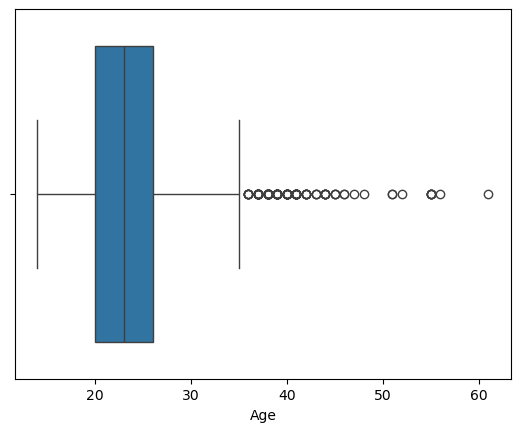

In [56]:
sns.boxplot(x=df_copy['Age'])

In [57]:
X = df_copy.drop(['NObeyesdad'],axis =1)
y = df_copy['NObeyesdad']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
r_scaler = RobustScaler()

In [62]:
X_train['Age'] = r_scaler.fit_transform(X_train[['Age']])
X_test['Age'] = r_scaler.transform(X_test[['Age']])

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [66]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [67]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
y_pred = tree.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
confusion_matrix(y_test,y_pred)

array([[46,  6,  4,  0,  0,  1,  2],
       [15, 18,  8,  3,  0, 13,  4],
       [ 0,  2, 44,  4,  1, 11,  8],
       [ 1,  0,  4, 58,  0,  0,  1],
       [ 0,  0,  0,  0, 60,  0,  0],
       [ 1,  6,  5,  3,  0, 38,  2],
       [ 2,  1,  8,  7,  0,  0, 31]], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        59
           1       0.55      0.30      0.38        61
           2       0.60      0.63      0.62        70
           3       0.77      0.91      0.83        64
           4       0.98      1.00      0.99        60
           5       0.60      0.69      0.64        55
           6       0.65      0.63      0.64        49

    accuracy                           0.71       418
   macro avg       0.69      0.70      0.69       418
weighted avg       0.70      0.71      0.69       418



In [72]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred_f = forest.predict(X_test)

In [76]:
confusion_matrix(y_test,y_pred_f)

array([[49,  7,  3,  0,  0,  0,  0],
       [ 7, 33,  8,  1,  0,  8,  4],
       [ 1,  2, 55,  1,  1,  5,  5],
       [ 0,  1,  1, 60,  0,  0,  2],
       [ 0,  0,  0,  0, 60,  0,  0],
       [ 1,  4,  4,  1,  0, 39,  6],
       [ 0,  2,  7,  2,  0,  1, 37]], dtype=int64)

In [77]:
print(classification_report(y_test,y_pred_f))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        59
           1       0.67      0.54      0.60        61
           2       0.71      0.79      0.74        70
           3       0.92      0.94      0.93        64
           4       0.98      1.00      0.99        60
           5       0.74      0.71      0.72        55
           6       0.69      0.76      0.72        49

    accuracy                           0.80       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.80      0.79       418

